# Spice simulatie

<a href="./slides/Spice-simulatie.slides.html">![slides](./images/slides-beschikbaar-blue.svg)</a> 

In deze cursus bestuderen we elektronische circuits. Hiervoor is het belangrijk dat we deze elektronische circuits ook in detail en correct kunnen simuleren. Hiervoor gebruiken we een implementatie van SPICE. SPICE staat voor xxx.


In dit jupyterbook gebruik ik [PySpice](). Dit is een python interface naar ngspice. Als je [conda]() geinstalleerd hebt en de github repository van [dit book]() lokaal gecloned hebt, kan je de volledige PySpice omgeving die in dit boek gebruikt wordt installeren door hetvolgende comando uit te voeren in de directory van deze repository:

```
conda env update -f .\binder\environment.yml
conda activate KULeuven
ipython kernel install --user --name=KULeuven
pyspice-post-installation --install-ngspice-dll
```

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from  matplotlib import patches
import scipy.signal as signal
import numpy as np
from PySpice.Probe.Plot import plot
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import schemdraw as schem
import schemdraw.elements as e
from ipywidgets import interact,FloatSlider
usewidgets=True;
    
def spicelisting(filename,firstline=0,lastline=10000):
    with open(filename) as f:
        for i,line in enumerate(f):
            if i>=firstline and i<lastline:
                print(line.strip())
    print()

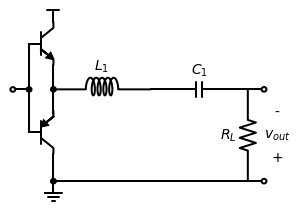

In [37]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
d.add(e.DOT)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

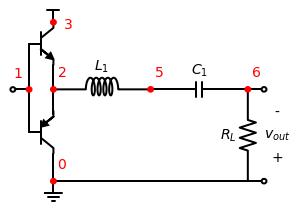

In [36]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT,color='red')
indot.add_label('1',  loc='center', ofst=[-0.2,.3], align=('right','bottom'))
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
vdd=d.add(e.DOT,color='red')
vdd.add_label('3',  loc='center', ofst=[0.6,-0.3], align=('right','bottom'))
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
pwm=d.add(e.DOT,color='red')
pwm.add_label('2',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
mid=d.add(e.DOT,color='red')
mid.add_label('5',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
out=d.add(e.DOT,color='red')
out.add_label('6',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
gg=d.add(e.DOT,color='red')
gg.add_label('0',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

De overeenkomende SPICE code voor dit circuit is:


In [15]:
spicelisting('simul/verschilversterker.sp')

* CIRCUIT Spice file van een verschilversterker
VDD    1 0 DC=5.0
VPLUS 10 0 DC=2.5
VMIN  11 0 SIN(2.5 50U 1E6) DC=2.5
VIN    9 0 DC=1.5
C3     3 0   5.914fF
C4     4 0  14.737fF
C5     5 0  10.124fF
C6     6 0  14.434fF
C8     8 0   7.919fF
C9     9 0  15.257fF
C10   10 0 1.872fF
C11   11 0 1.688fF
C25    1 5  1fF
MN1 3 5 0 0  NMOS w=1.50u L=0.50u
MN2 0 5 5 0  NMOS w=1.50u L=0.50u
MN3 8 10 4 0 NMOS w=1.50u L=0.50U
MN4 0 9 8 0  NMOS w=4.50u L=0.50U
MN5 6 11 8 0 NMOS w=1.50u L=0.50U
MN6 0 9 9 0  NMOS w=4.50u L=0.50U
MP1 1 4 3 1  PMOS w=3.50u L=0.50U
MP2 4 4 1 1  PMOS w=3.50u L=0.50U
MP3 1 6 5 1  PMOS w=3.50u L=0.50U
MP4 6 6 1 1  PMOS w=3.50u L=0.50U
.MODEL NMOS NMOS(LEVEL=1 VTO=0.50 KP=90.000E-6 LAMBDA=0.001)
.MODEL PMOS PMOS(LEVEL=1 VTO=-0.45 KP=55.000E-6 LAMBDA=0.001)



<p class=spicecaption>basiscircuit van de verschilversterker</p>

De nMOS transistors in dit circuit zijn:

In [23]:
spicelisting('simul/verschilversterker.sp',firstline=20,lastline=24)

MP1 1 4 3 1  PMOS w=3.50u L=0.50U
MP2 4 4 1 1  PMOS w=3.50u L=0.50U
MP3 1 6 5 1  PMOS w=3.50u L=0.50U
MP4 6 6 1 1  PMOS w=3.50u L=0.50U



De pMOS transistors in dit circuit zijn:

In [23]:
spicelisting('simul/verschilversterker.sp',firstline=20,lastline=24)

MP1 1 4 3 1  PMOS w=3.50u L=0.50U
MP2 4 4 1 1  PMOS w=3.50u L=0.50U
MP3 1 6 5 1  PMOS w=3.50u L=0.50U
MP4 6 6 1 1  PMOS w=3.50u L=0.50U



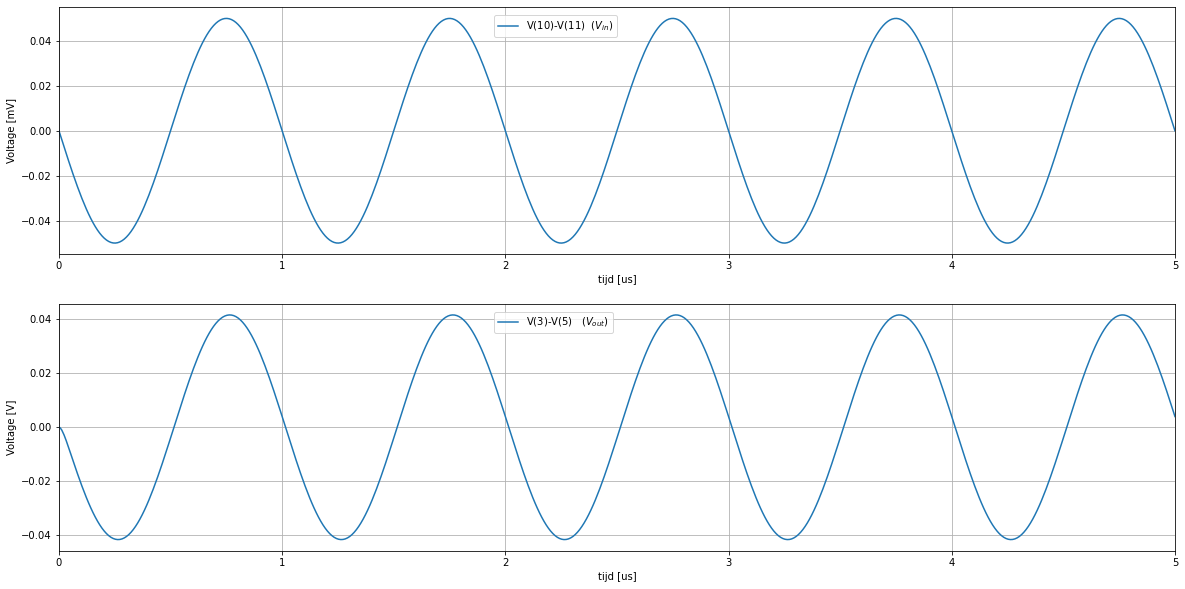

In [14]:
circuit=SpiceParser(path='simul/verschilversterker.sp').build_circuit()  
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-8, end_time=5e-6)
figure, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,(analysis.nodes['10']-analysis.nodes['11'])*1000,label='V(10)-V(11)  ($V_{in}$)')
ax[1].plot(analysis.time*1e6,analysis.nodes['3']-analysis.nodes['5'],label='V(3)-V(5)   ($V_{out}$)' )
ax[0].grid()
ax[0].legend( loc=(0.39,.88))
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,5e-6*1e6)
ax[0].set_ylabel('Voltage [mV]')
ax[1].grid()
ax[1].legend( loc=(0.39,.88))
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,5e-6*1e6)
ax[1].set_ylabel('Voltage [V]')
plt.show()